In [1]:
library = [('Author', 'Topic', 'Pages'), ('Twain', 'Rafting', 601), ('Feynman', 'Physics', 95), ('Hamilton', 'Mythology', 144)]


In [2]:
library

[('Author', 'Topic', 'Pages'),
 ('Twain', 'Rafting', 601),
 ('Feynman', 'Physics', 95),
 ('Hamilton', 'Mythology', 144)]

In [3]:
# Formatting the dictionary for better representation
for author, topic, pages in library:
    print(f"{author:{15}}  {topic:{10}}  {pages:>{10}}")

Author           Topic            Pages
Twain            Rafting            601
Feynman          Physics             95
Hamilton         Mythology          144


In [4]:
from datetime import datetime

In [5]:
today = datetime(year = 2020, month = 4, day = 20)

In [6]:
print(f"{today: %B %d, %Y}")

 April 20, 2020


In [7]:
%%writefile mynewtext1.txt
This is the first line
This is the second line

Writing mynewtext1.txt


In [8]:
with open('mynewtext1.txt', mode = 'r') as mytextt:
    content = mytextt.readlines()

In [9]:
content

['This is the first line\n', 'This is the second line\n']

In [10]:
import re

In [11]:
pattern = 'sector-11'

In [12]:
 text = 'my address is sector-11, noida and just after sector-11'

In [13]:
my_match = re.search(pattern,text)

In [14]:
my_match.start()

14

In [15]:
for match in re.finditer(pattern, text):
    print(match.span())

(14, 23)
(46, 55)


In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [18]:
doc = nlp(u"Tesla is looking at buying U.S. startup for $6 million.")

In [19]:
for text in doc:
    print(f'{text.text:{10}} {text.pos_:{10}}   {text.dep_:{10}}')

Tesla      PROPN        nsubj     
is         VERB         aux       
looking    VERB         ROOT      
at         ADP          prep      
buying     VERB         pcomp     
U.S.       PROPN        compound  
startup    NOUN         dobj      
for        ADP          prep      
$          SYM          quantmod  
6          NUM          compound  
million    NUM          pobj      
.          PUNCT        punct     


In [20]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x12d2f16c348>),
 ('parser', <spacy.pipeline.DependencyParser at 0x12d2f16a108>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x12d2f16a6a8>)]

In [21]:
nlp.pipe_names

['tagger', 'parser', 'ner']

In [22]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [23]:
for t in doc3:
    print(t, end=' | ')

Although | commmonly | attributed | to | John | Lennon | from | his | song | " | Beautiful | Boy | " | , | the | phrase | " | Life | is | what | happens | to | us | while | we | are | making | other | plans | " | was | written | by | cartoonist | Allen | Saunders | and | published | in | Reader | 's | Digest | in | 1957 | , | when | Lennon | was | 17 | . | 

In [24]:
for entity in doc.ents:
    print(entity)
    print(entity.label_)
    print(spacy.explain(entity.label_))
    print('\n')

U.S.
GPE
Countries, cities, states


$6 million
MONEY
Monetary values, including unit




In [25]:
for chunk in doc.noun_chunks:
    print(chunk)

Tesla
U.S. startup


In [26]:
from spacy import displacy

In [27]:
doc = nlp('Apple is going to build a U.K. factory for $10 million')

In [28]:
displacy.render(doc, style = 'dep', jupyter = True, options={'distance': 110})

In [29]:
displacy.render(doc, style= 'ent', jupyter=True)

In [30]:
#Lemmatization

In [31]:
doc1 = nlp('I am a coder and I taught myself because I have been coding since school days')

In [32]:
for token in doc1:
    print(f'{token.text:{10}} {token.pos_:{10}} {token.lemma_:{10}}')

I          PRON       -PRON-    
am         VERB       be        
a          DET        a         
coder      NOUN       coder     
and        CCONJ      and       
I          PRON       -PRON-    
taught     VERB       teach     
myself     PRON       -PRON-    
because    ADP        because   
I          PRON       -PRON-    
have       VERB       have      
been       VERB       be        
coding     VERB       cod       
since      ADP        since     
school     NOUN       school    
days       NOUN       day       


In [33]:
len(nlp.Defaults.stop_words)

305

In [34]:
# If you want to add your custom stopwords
nlp.Defaults.stop_words.add('Mystery')

In [35]:
# Now we can check that also
nlp.vocab['Mystery'].is_stop = True

In [36]:
nlp.vocab['Mystery'].is_stop

True

In [37]:
# We can check the length to see the change
len(nlp.Defaults.stop_words)

306

### Phrase and Vocabulary Matching

In [38]:
from spacy.matcher import Matcher # It is a simple rule based matching where we provide pattern and run a search though a doc

In [39]:
matcher = Matcher(nlp.vocab)

In [40]:
pattern1 = [{'LOWER':'solarpower'}]
pattern2 = [{'LOWER':'solar'},{'IS_PUNCT':True}, {'LOWER': 'power'}]

In [41]:
pattern2

[{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

In [42]:
matcher.add('SolarPower',  None, pattern1, pattern2)

In [43]:
doc_match = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [44]:
found_matche = matcher(doc_match)

In [45]:
print(found_matche) # (String matching, start , end)

[(8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [46]:
# We can also print the exact matching that we have found

for matchid, start, end in found_matche:
    stringid = nlp.vocab.strings[matchid]   #Matching the id with string in doc
    span = doc_match[start:end]                    #Extracting the actual string
    print(stringid, start, end, span.text)

SolarPower 10 11 solarpower
SolarPower 13 16 Solar-power


In [47]:
# we can also match phrases through spacy

from spacy.matcher import PhraseMatcher

In [48]:
matcher = PhraseMatcher(nlp.vocab)

In [50]:
with open('../UPDATED_NLP_COURSE/TextFiles/reaganomics.txt') as text:
    doc4 = nlp(text.read())

In [51]:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics','free-market economics']

In [52]:
phrase_patters = [nlp(text) for text in phrase_list]

In [53]:
matcher.add('EconMatcher', None, *phrase_patters)

In [54]:
phrase_patters

[voodoo economics,
 supply-side economics,
 trickle-down economics,
 free-market economics]

In [55]:
found_matches = matcher(doc4)

In [56]:
found_matches

[(3680293220734633682, 41, 45),
 (3680293220734633682, 49, 53),
 (3680293220734633682, 54, 56),
 (3680293220734633682, 61, 65),
 (3680293220734633682, 673, 677),
 (3680293220734633682, 2985, 2989)]

In [57]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc4[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

3680293220734633682 EconMatcher 41 45 supply-side economics
3680293220734633682 EconMatcher 49 53 trickle-down economics
3680293220734633682 EconMatcher 54 56 voodoo economics
3680293220734633682 EconMatcher 61 65 free-market economics
3680293220734633682 EconMatcher 673 677 supply-side economics
3680293220734633682 EconMatcher 2985 2989 trickle-down economics


In [58]:
doc6 = nlp('Apple is going to build a U.K. factory for $10 million')

In [59]:
for token in doc6:
    print(f"{token.text:{10}}  {token.pos_:{10}}  {token.tag_:{10}}  {spacy.explain(token.tag_):{10}}")

Apple       PROPN       NNP         noun, proper singular
is          VERB        VBZ         verb, 3rd person singular present
going       VERB        VBG         verb, gerund or present participle
to          PART        TO          infinitival to
build       VERB        VB          verb, base form
a           DET         DT          determiner
U.K.        PROPN       NNP         noun, proper singular
factory     NOUN        NN          noun, singular or mass
for         ADP         IN          conjunction, subordinating or preposition
$           SYM         $           symbol, currency
10          NUM         CD          cardinal number
million     NUM         CD          cardinal number


In [60]:
# We can also count the number of POS taggings in a document

pos_counts = doc6.count_by(spacy.attrs.POS)

In [61]:
pos_counts

{98: 1, 99: 3, 84: 1, 89: 1, 91: 1, 92: 2, 93: 1, 95: 2}

In [62]:
for k,v in sorted(pos_counts.items()):
    print(f"{k   } {doc6.vocab[k].text:{10}} {v} ")

84 ADP        1 
89 DET        1 
91 NOUN       1 
92 NUM        2 
93 PART       1 
95 PROPN      2 
98 SYM        1 
99 VERB       3 


In [63]:
# Visualizing parts of speech

displacy.render(doc6, style='dep', jupyter = True, options={'distance':110, 'color': 'red'})

## Named Entity Recognition

In [64]:
print(doc6.ents)

(Apple, U.K., $10 million)


In [65]:
def show_ents(doc):
    if doc.ents:
        for entity in doc.ents:
            print(f"{entity.text:{15}} {entity.label_:{10}} {str(spacy.explain(entity.label_))} ")
    else:
        print('No entity found')

In [66]:
show_ents(doc6)

Apple           ORG        Companies, agencies, institutions, etc. 
U.K.            GPE        Countries, cities, states 
$10 million     MONEY      Monetary values, including unit 


In [67]:
doc7 = nlp('New Delhi is a city of 3 million people and the economy is $7 million')

In [68]:
show_ents(doc7)

New Delhi       GPE        Countries, cities, states 
3 million       CARDINAL   Numerals that do not fall under another type 
$7 million      MONEY      Monetary values, including unit 


In [3]:
import numpy as np

In [4]:
import pandas as pd

In [72]:
data = pd.read_csv('../Data-Science/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', delimiter='\t')

In [73]:
data.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [7]:
data.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
len(data) #Number of data points aka rows

5572

In [9]:
data.label.unique()

array(['ham', 'spam'], dtype=object)

In [10]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [11]:
from spacy.lang.en import STOP_WORDS

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Chayan
[nltk_data]     Shrangraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.corpus import stopwords

In [41]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [42]:
for i in 'I am having my dinner'.split():
    ps.stem(i)
    print(i)

I
am
having
my
dinner


In [46]:
import re

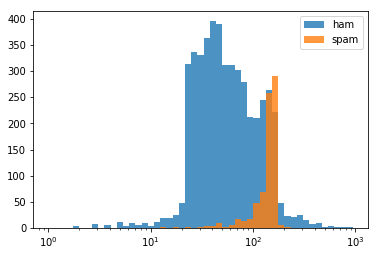

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(data[data['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

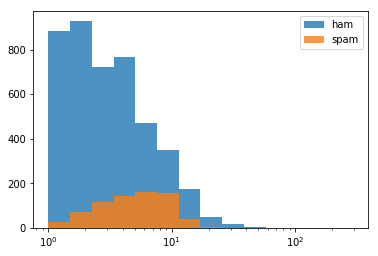

In [78]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(data[data['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(data[data['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# X - Feature data

# Y - Label

X = data[['length', 'punct']]

y = data['label']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [82]:
print(X_train.shape)
print(X_test.shape)

(3900, 2)
(1672, 2)


### Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
logr_model = LogisticRegression(solver='lbfgs')

In [85]:
logr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [86]:
from sklearn import metrics

In [87]:
predict_logr_model = logr_model.predict(X_test)

In [88]:
predict_logr_model

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [89]:
metrics.confusion_matrix(y_test,predict_logr_model)

array([[1429,   30],
       [ 206,    7]], dtype=int64)

In [90]:
print(metrics.classification_report(y_test,predict_logr_model))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.92      1459
        spam       0.19      0.03      0.06       213

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.53      0.51      0.49      1672
weighted avg       0.79      0.86      0.81      1672



In [91]:
print(metrics.accuracy_score(y_test,predict_logr_model))

0.8588516746411483


### Multinomial NB Model

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
nb_model= MultinomialNB()

In [94]:
nb_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [95]:
predict_nb_model = nb_model.predict(X_test)

In [96]:
print(metrics.confusion_matrix(y_test,predict_nb_model))

[[1450    9]
 [ 207    6]]


In [97]:
print(metrics.classification_report(y_test,predict_nb_model))

              precision    recall  f1-score   support

         ham       0.88      0.99      0.93      1459
        spam       0.40      0.03      0.05       213

   micro avg       0.87      0.87      0.87      1672
   macro avg       0.64      0.51      0.49      1672
weighted avg       0.81      0.87      0.82      1672



### Support Vector Machine

In [98]:
from sklearn.svm import SVC

In [99]:
svc_model = SVC(gamma = 'auto')

In [100]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
predict_svm_model = svc_model.predict(X_test)

In [102]:
metrics.confusion_matrix(y_test,predict_svm_model)

array([[1402,   57],
       [ 120,   93]], dtype=int64)

In [103]:
print(metrics.classification_report(y_test,predict_svm_model))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94      1459
        spam       0.62      0.44      0.51       213

   micro avg       0.89      0.89      0.89      1672
   macro avg       0.77      0.70      0.73      1672
weighted avg       0.88      0.89      0.89      1672



In [104]:
from sklearn.metrics import accuracy_score

In [105]:
print(accuracy_score(y_test,predict_svm_model))

0.8941387559808612


# MOVIE REVIEW CLASSIFICATION PROJECT

In [106]:
df = pd.read_csv('../UPDATED_NLP_COURSE/TextFiles/moviereviews.tsv', delimiter='\t')

In [107]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [108]:
len(df)

2000

In [109]:
df['review'][2]

'this has been an extraordinary year for australian films . \r\n " shine " has just scooped the pool at the australian film institute awards , picking up best film , best actor , best director etc . to that we can add the gritty " life " ( the anguish , courage and friendship of a group of male prisoners in the hiv-positive section of a jail ) and " love and other catastrophes " ( a low budget gem about straight and gay love on and near a university campus ) . \r\ni can\'t recall a year in which such a rich and varied celluloid library was unleashed from australia . \r\n " shine " was one bookend . \r\nstand by for the other one : " dead heart " . \r\n>from the opening credits the theme of division is established . \r\nthe cast credits have clear and distinct lines separating their first and last names . \r\nbryan | brown . \r\nin a desert settlement , hundreds of kilometres from the nearest town , there is an uneasy calm between the local aboriginals and the handful of white settlers 

In [110]:
df.isnull().sum() #reviews are missing

label      0
review    35
dtype: int64

In [111]:
df.dropna(inplace=True)

In [112]:
# Now generally we would be having empty string in place of actual data. In that case, we can use isspace() method to find

In [113]:
blanks = []


for i, lb, rv in df.itertuples():
    if rv.isspace():
        blanks.append((i)) # Index positions
    
print(blanks, end=' ')




[57, 71, 147, 151, 283, 307, 313, 323, 343, 351, 427, 501, 633, 675, 815, 851, 977, 1079, 1299, 1455, 1493, 1525, 1531, 1763, 1851, 1905, 1993] 

In [114]:
len(blanks)

27

In [115]:
df.drop(blanks) # 1938 rows

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
7,neg,tim robbins and martin lawernce team up in thi...
8,neg,"in "" gia "" , angelina jolie plays the titular ..."
9,neg,"in 1990 , the surprise success an unheralded l..."


In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = df.review

In [118]:
y = df.label

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.33)

In [120]:
from sklearn.pipeline import Pipeline

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
from sklearn.svm import LinearSVC

In [123]:
Text_Classifier = Pipeline([('TfIdf', TfidfVectorizer()), ('svm', LinearSVC())])

In [124]:
Text_Classifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('TfIdf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [125]:
predictions_linearsvc = Text_Classifier.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [127]:
confusion_matrix(y_test, predictions_linearsvc)

array([[262,  46],
       [ 56, 285]], dtype=int64)

In [128]:
print(classification_report(y_test,predictions_linearsvc))

              precision    recall  f1-score   support

         neg       0.82      0.85      0.84       308
         pos       0.86      0.84      0.85       341

   micro avg       0.84      0.84      0.84       649
   macro avg       0.84      0.84      0.84       649
weighted avg       0.84      0.84      0.84       649



In [129]:
print(accuracy_score(y_test,predictions_linearsvc))

0.8428351309707242


In [130]:
# Very good accuracy score considering the fact that we have done this on raw text # Amazing